### Importing Libraries

In [275]:
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['figure.figsize']=(10,6)
%matplotlib inline

In [276]:
df_titanic = pd.read_csv('Titanic-Dataset.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [277]:
df_titanic.shape

(891, 12)

### Exploratory Data Analysis

In [278]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [279]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [280]:
df_titanic.drop_duplicates(inplace=True)

In [281]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Percentage of Missing values for each column

Formula : df.isunll().sum()/len(df)*100

In [282]:
df_titanic.isnull().sum()/len(df_titanic)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

### Dropping columns which contains more than 50% of missing values

In [283]:
df_titanic.drop(columns = 'Cabin',inplace=True)

In [284]:
df_titanic.Age.value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [285]:
df_titanic['Age']=df_titanic['Age'].fillna(df_titanic['Age'].median())

#### All the null values have been replaced

In [286]:
df_titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [287]:
df_titanic.Embarked.mode()[0]

'S'

In [288]:
df_titanic.Embarked = df_titanic.Embarked.fillna(df_titanic.Embarked.mode()[0])

In [289]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [290]:
df_titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Dropping Unwanted Columns

In [291]:
df_titanic.drop(columns=['Ticket','Name'],inplace=True)

In [292]:
df_titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [293]:
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

### Converting the datatype

In [294]:
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [295]:
df_titanic.Sex.replace({'male': 0,'female': 1},inplace=True)

In [296]:
df_titanic['Sex'] = df_titanic['Sex'].astype('int64')

In [297]:
df_titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S


In [298]:
df_titanic.Embarked.value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

### Onehot Encoding

In [299]:
df_embarked = pd.get_dummies(df_titanic.Embarked,drop_first=True)

In [300]:
df_titanic = pd.concat([df_titanic,df_embarked],axis=1)

In [301]:
df_titanic.drop(columns='Embarked',inplace=True)
df_titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,1,0,3,0,22.0,1,0,7.2500,False,True
1,2,1,1,1,38.0,1,0,71.2833,False,False
2,3,1,3,1,26.0,0,0,7.9250,False,True
3,4,1,1,1,35.0,1,0,53.1000,False,True
4,5,0,3,0,35.0,0,0,8.0500,False,True


In [302]:
df_titanic['Q'] = df_titanic['Q'].astype('int64')
df_titanic['S'] = df_titanic['S'].astype('int64')

In [303]:
df_titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,1,0,3,0,22.0,1,0,7.2500,0,1
1,2,1,1,1,38.0,1,0,71.2833,0,0
2,3,1,3,1,26.0,0,0,7.9250,0,1
3,4,1,1,1,35.0,1,0,53.1000,0,1
4,5,0,3,0,35.0,0,0,8.0500,0,1


### Data Visualization

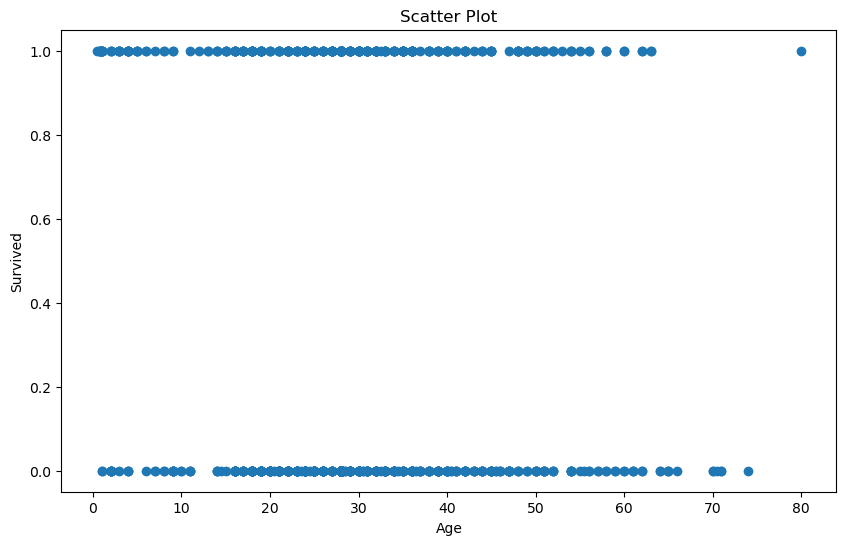

In [304]:
plt.scatter(x='Age',y='Survived',data=df_titanic)
plt.xlabel('Age') 
plt.ylabel('Survived')
plt.title('Scatter Plot')
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

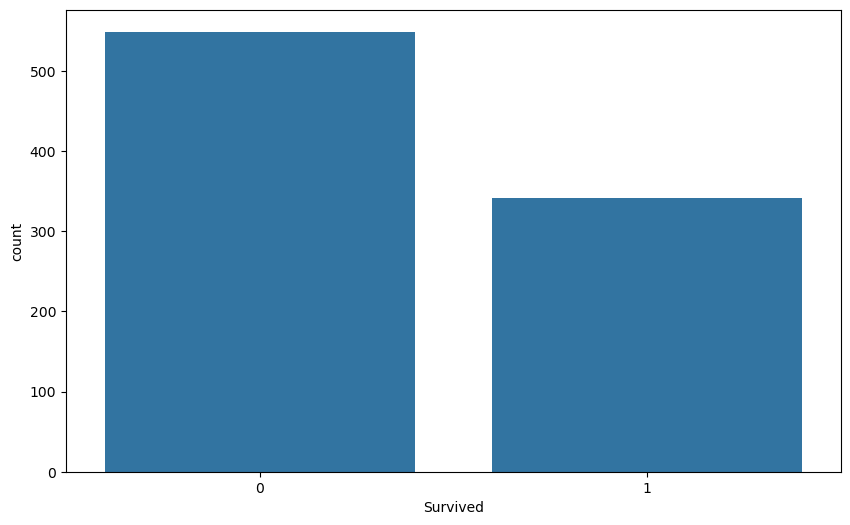

In [305]:
sns.countplot(x='Survived',data=df_titanic)

<Axes: >

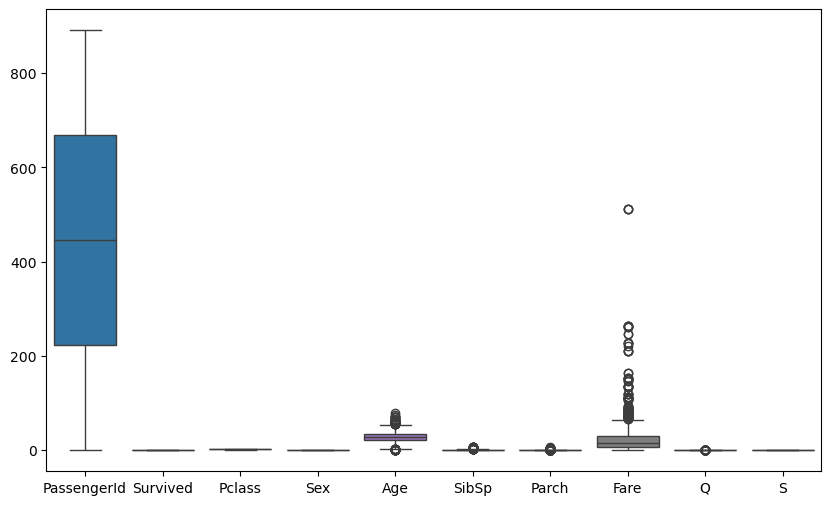

In [306]:
sns.boxplot(df_titanic)

### Removing Outliers

In [307]:
from scipy import stats
import numpy as np

# Calculate the z-scores for each column
z_scores = np.abs(stats.zscore(df_titanic[['Age', 'SibSp', 'Parch', 'Fare', 'Q']]))
threshold = 3  # Typical threshold; you can adjust this

# Keep rows where all z-scores are less than the threshold
df_titanic_filtered = df_titanic[(z_scores < threshold).all(axis=1)]

# Print the shape before and after removing outliers
print('Before Removing Outliers:')
print(df_titanic.shape)
print('After Removing Outliers:')
print(df_titanic_filtered.shape)


Before Removing Outliers:
(891, 10)
After Removing Outliers:
(749, 10)


In [308]:
df_titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,1,0,3,0,22.0,1,0,7.2500,0,1
1,2,1,1,1,38.0,1,0,71.2833,0,0
2,3,1,3,1,26.0,0,0,7.9250,0,1
3,4,1,1,1,35.0,1,0,53.1000,0,1
4,5,0,3,0,35.0,0,0,8.0500,0,1


In [309]:
df_titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Q              0
S              0
dtype: int64

In [310]:
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Q                int64
S                int64
dtype: object

In [311]:
X = df_titanic.drop(columns = ['Survived','PassengerId'])
y = df_titanic['Survived']

In [312]:
import warnings 
warnings.filterwarnings('ignore')

In [313]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report


from sklearn.preprocessing import StandardScaler  

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Logistic Regression Training Score:", model.score(X_train, y_train))

pred = accuracy_score(y_pred, y_test)
print('Logistic Regression Accuracy:', pred)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Decision Tree Model
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)  
y_pred = model2.predict(X_test)
print("Decision Tree Training Score:", model2.score(X_train, y_train))

pred = accuracy_score(y_pred, y_test)
print('Decision Tree Accuracy:', pred)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Decision Tree Model
model3 = RandomForestClassifier()
model3.fit(X_train, y_train)  # Fit model2, not model
y_pred = model3.predict(X_test)
print("Random Forest Training Score:", model3.score(X_train, y_train))

pred = accuracy_score(y_pred, y_test)
print('Random Forest Accuracy:', pred)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression Training Score: 0.800561797752809
Logistic Regression Accuracy: 0.8100558659217877
Confusion Matrix:
[[90 15]
 [19 55]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Decision Tree Training Score: 0.9789325842696629
Decision Tree Accuracy: 0.7877094972067039
Confusion Matrix:
[[86 19]
 [19 55]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       105
           1       0.74      0.74      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

Random Forest Training Score:

In [316]:
def predict_survival(Pclass, Sex, Age, SibSp, Parch, Fare, Q, S):
    # Create a NumPy array from the input variables
    input_data = np.array([[Pclass, Sex, Age, SibSp, Parch, Fare, Q, S]])
    
    # Apply any preprocessing that was done on the training data
    input_data_scaled = scaler.transform(input_data)
    
    # Use the trained model to make a prediction
    prediction = model.predict(input_data_scaled)
    
    # Return the prediction (0 = Did not survive, 1 = Survived)
    return prediction[0]

def get_user_input():
    # Get user input for each feature
    Pclass = int(input("Enter Pclass (1, 2, or 3): "))
    Sex = int(input("Enter Sex (0 for male, 1 for female): "))
    Age = float(input("Enter Age: "))
    SibSp = int(input("Enter number of Siblings/Spouses aboard: "))
    Parch = int(input("Enter number of Parents/Children aboard: "))
    Fare = float(input("Enter Fare: "))
    Q = int(input("Enter 1 if embarked at Q, otherwise 0: "))
    S = int(input("Enter 1 if embarked at S, otherwise 0: "))

    # Survived is not required for prediction; it’s the output we are predicting.
    return Pclass, Sex, Age, SibSp, Parch, Fare, Q, S

# Main code to run the prediction
Pclass, Sex, Age, SibSp, Parch, Fare, Q, S = get_user_input()

# Make a prediction
survival_prediction = predict_survival(Pclass, Sex, Age, SibSp, Parch, Fare, Q, S)

# Print the result
if survival_prediction == 1:
    print("Predicted: Survived")
else:
    print("Predicted: Did not Survive")

Predicted: Did not Survive
